### Блок импорта библиотек

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression #Линейная регрессия
from sklearn.tree import DecisionTreeClassifier #Деревья решений
from sklearn.neighbors import KNeighborsClassifier #К-ближ. соседей
from sklearn.model_selection import train_test_split #модель разбиения данных на тест и обучение
from sklearn.preprocessing import StandardScaler, MinMaxScaler,scale #Модель нормализации данных
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Загрузка данных
data=pd.read_csv('movie_metadata.csv', sep=',')

### Первичный просмотр данных

In [3]:
#Чтобы посмотреть первые N строк данных используем команду
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [45]:
#Информация о составе колонок и их типе, числе заполненных записей.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

### Предобработка данных

In [4]:
"""Выделим имена колонок для этого воспользуемся циклом FOR"""
for i in data.columns:
    print(i)

color
director_name
num_critic_for_reviews
duration
director_facebook_likes
actor_3_facebook_likes
actor_2_name
actor_1_facebook_likes
gross
genres
actor_1_name
movie_title
num_voted_users
cast_total_facebook_likes
actor_3_name
facenumber_in_poster
plot_keywords
movie_imdb_link
num_user_for_reviews
language
country
content_rating
budget
title_year
actor_2_facebook_likes
imdb_score
aspect_ratio
movie_facebook_likes


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [23]:
data['movie_facebook_likes'].describe() #Посмотрим на распределение значений числа лайков

count      5043.000000
mean       7525.964505
std       19320.445110
min           0.000000
25%           0.000000
50%         166.000000
75%        3000.000000
max      349000.000000
Name: movie_facebook_likes, dtype: float64

In [85]:
data['is_popular']=data['movie_facebook_likes'].map(lambda x:1 if x>0 else 0)

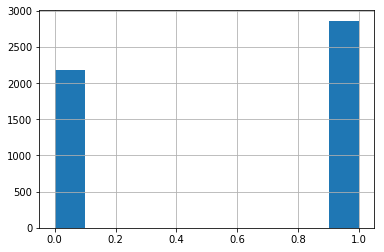

In [86]:
data['is_popular'].hist()

In [87]:
"""Выберем в качестве целевой переменной число лайков в фейсбук к фильму (т.е. популярность фильма в соц.сетях)"""
target_col=['movie_facebook_likes', 'is_popular']

In [88]:
data[target_col].iloc[:1]
data.iloc[0][1]
data.iloc[0, :]



color                                                                    Color
director_name                                                    James Cameron
num_critic_for_reviews                                                     723
duration                                                                   178
director_facebook_likes                                                      0
actor_3_facebook_likes                                                     855
actor_2_name                                                  Joel David Moore
actor_1_facebook_likes                                                    1000
gross                                                              7.60506e+08
genres                                         Action|Adventure|Fantasy|Sci-Fi
actor_1_name                                                       CCH Pounder
movie_title                                                            Avatar 
num_voted_users                                     

In [30]:
"""Выделим только вещественные и целые признаки  для простоты, воспользуясь list_comprehension"""
float_col=[col for col in data.columns if data[col].dtypes!=object and col not in target_col]

In [31]:
float_col

['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'actor_3_facebook_likes',
 'actor_1_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'num_user_for_reviews',
 'budget',
 'title_year',
 'actor_2_facebook_likes',
 'imdb_score',
 'aspect_ratio']

In [32]:
data[float_col].dropna(subset=['gross'])

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,1144337,106759,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35
5,462.0,132.0,475.0,530.0,640.0,73058679.0,212204,1873,1.0,738.0,263700000.0,2012.0,632.0,6.6,2.35
6,392.0,156.0,0.0,4000.0,24000.0,336530303.0,383056,46055,0.0,1902.0,258000000.0,2007.0,11000.0,6.2,2.35
7,324.0,100.0,15.0,284.0,799.0,200807262.0,294810,2036,1.0,387.0,260000000.0,2010.0,553.0,7.8,1.85
8,635.0,141.0,0.0,19000.0,26000.0,458991599.0,462669,92000,4.0,1117.0,250000000.0,2015.0,21000.0,7.5,2.35
9,375.0,153.0,282.0,10000.0,25000.0,301956980.0,321795,58753,3.0,973.0,250000000.0,2009.0,11000.0,7.5,2.35
10,673.0,183.0,0.0,2000.0,15000.0,330249062.0,371639,24450,0.0,3018.0,250000000.0,2016.0,4000.0,6.9,2.35


In [33]:
"""Восстановим пропуски в данных 3 способами"""
#1. Медианой
data_median=data[float_col].fillna(data[float_col].median())
data_mean=data[float_col].fillna(data[float_col].mean())
data_0=data[float_col].fillna(0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE37CC4CF8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DE3CF45B70>]], dtype=object)

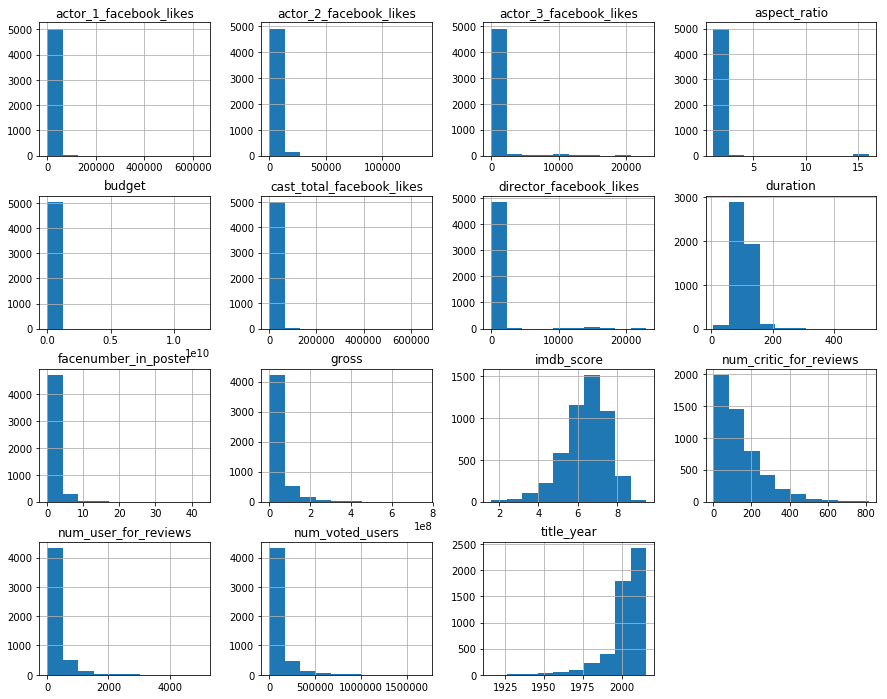

In [34]:
"""Посмотрим на распределение признаков"""

data_median.hist(figsize=(15,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE3D60C390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DE3D3BFE10>]], dtype=object)

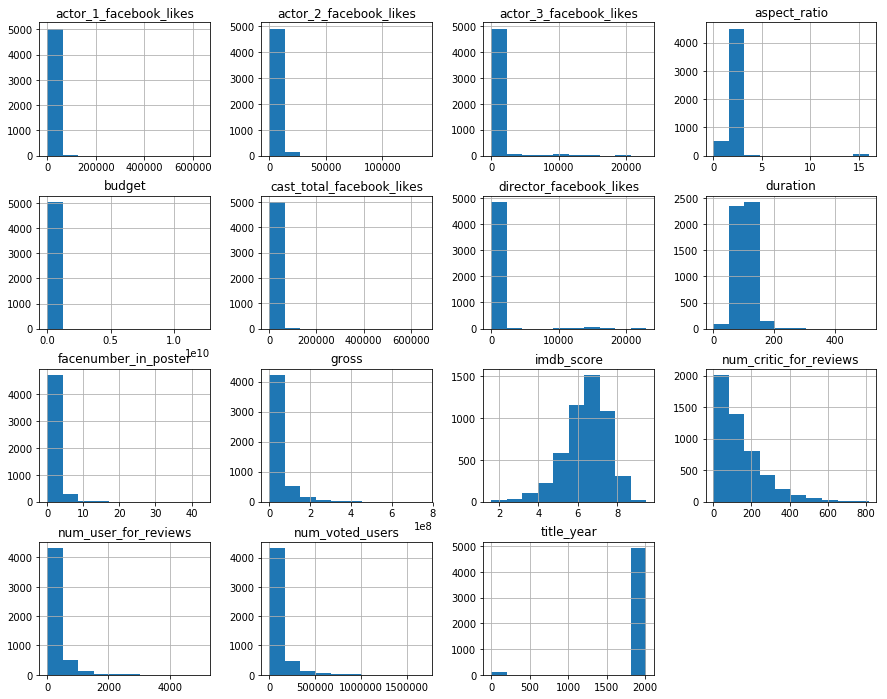

In [35]:
"""Посмотрим на распределение признаков"""
data_0.hist(figsize=(15,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DE3D4226D8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001DE3DC4DBA8>]], dtype=object)

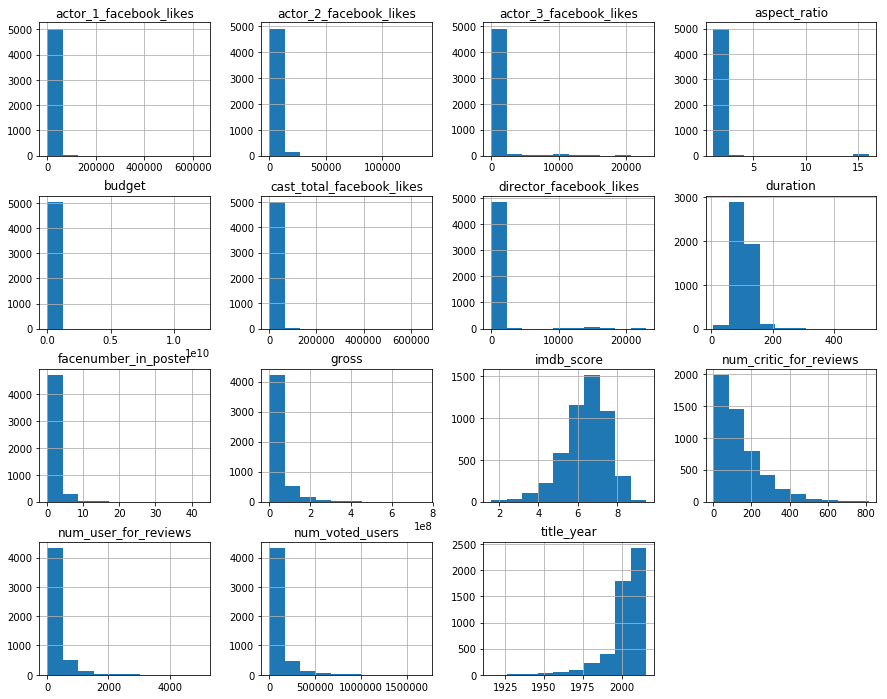

In [36]:
"""Посмотрим на распределение признаков"""
data_mean.hist(figsize=(15,12))

#### Выводы:
Восстановление при помощи зануления пропусков смещает выборку к "0"
Поэтому воспользуемся по желанию выборкой восстановленной по медиане или среднему

------------------------ 

### Моделирование

In [89]:
X=data_median
Y=data[target_col[1]]

In [90]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2)

### K-NN

In [91]:
"""Т.к. данный представлены в разных масштабах произведем нормирование данных к [0,1]"""
MinMax=MinMaxScaler()
MinMax.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [92]:
X_t_minmax=MinMax.transform(X_train)
X_te_minmax=MinMax.transform(X_test)

In [93]:
knn=KNeighborsClassifier(6)

In [94]:
knn.fit(X_t_minmax, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [95]:
knn.score(X_te_minmax,y_test)

0.72943508424182357

K is:  2 |Accuracy is:  0.680872150644
K is:  3 |Accuracy is:  0.718533201189
K is:  4 |Accuracy is:  0.724479682854
K is:  5 |Accuracy is:  0.723488602577
K is:  6 |Accuracy is:  0.729435084242
K is:  7 |Accuracy is:  0.745292368682
K is:  8 |Accuracy is:  0.738354806739
K is:  9 |Accuracy is:  0.742319127849
K is:  10 |Accuracy is:  0.741328047572
K is:  11 |Accuracy is:  0.751238850347
K is:  12 |Accuracy is:  0.750247770069
K is:  13 |Accuracy is:  0.746283448959
K is:  14 |Accuracy is:  0.746283448959


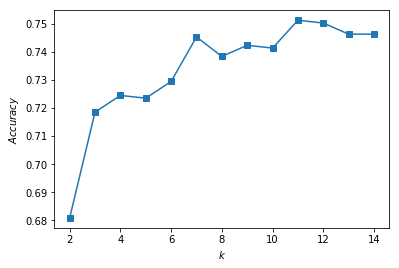

In [118]:
"""Изобразим график обучения"""
scores=[]
for k in range(2, 15):
    knn=KNeighborsClassifier(k).fit(X_t_minmax, y_train)
    scores.append(knn.score(X_te_minmax,y_test))
    print('K is: ', k,'|Accuracy is: ', knn.score(X_te_minmax,y_test))
plt.plot(range(2, 15), scores, marker='s');
plt.xlabel('$k$')
plt.ylabel('$Accuracy$');

K is:  2 |Accuracy is:  0.544103072349
K is:  3 |Accuracy is:  0.577799801784
K is:  4 |Accuracy is:  0.580773042616
K is:  5 |Accuracy is:  0.600594648167
K is:  6 |Accuracy is:  0.577799801784
K is:  7 |Accuracy is:  0.591674925669
K is:  8 |Accuracy is:  0.577799801784
K is:  9 |Accuracy is:  0.590683845391
K is:  10 |Accuracy is:  0.566897918731
K is:  11 |Accuracy is:  0.576808721506
K is:  12 |Accuracy is:  0.570862239841
K is:  13 |Accuracy is:  0.577799801784
K is:  14 |Accuracy is:  0.564915758176
K is:  15 |Accuracy is:  0.566897918731
K is:  16 |Accuracy is:  0.565906838454
K is:  17 |Accuracy is:  0.568880079286
K is:  18 |Accuracy is:  0.551040634291
K is:  19 |Accuracy is:  0.554013875124
K is:  20 |Accuracy is:  0.558969276511


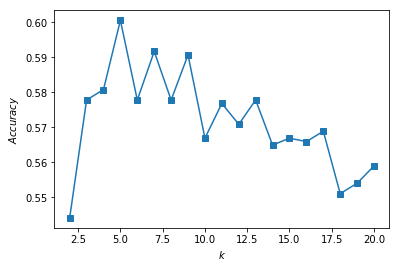

In [119]:
"""Изобразим график обучения но для не нормированных данных"""
scores=[]
for k in range(2, 21):
    knn=KNeighborsClassifier(k).fit(X_train, y_train)
    scores.append(knn.score(X_test,y_test))
    print('K is: ', k,'|Accuracy is: ', knn.score(X_test,y_test))
plt.plot(range(2, 21), scores, marker='s');
plt.xlabel('$k$')
plt.ylabel('$Accuracy$');

### LinearRegression

In [120]:
lr=LogisticRegression(random_state=42, C=0.1)

In [121]:
"""Т.к. линейные модели чувствительны к масштабу и требуют `нормальности` """
std_scaler=StandardScaler()
std_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [122]:
X_t_std=std_scaler.transform(X_train)
X_te_std=std_scaler.transform(X_test)

In [123]:
lr.fit(X_t_std, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [124]:
models={
   'Linear_regression': lr
}

In [125]:
for i in models:
    print(i, models[i].score(X_te_std, y_test))

Linear_regression 0.615460852329


In [126]:
X_t_std=np.log2(10+X_t_std)
X_te_std=np.log2(10+X_te_std)

In [127]:
lr.fit(X_t_std, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [128]:
for i in models:
    print(i, models[i].score(X_te_std, y_test))

Linear_regression 0.578790882061


### DTrees

In [129]:
dtree=DecisionTreeClassifier(random_state=1234)

In [130]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

In [131]:
dtree.score(X_test, y_test)

0.73835480673934584

Depth is:  1 |Accuracy is:  0.546085232904
Depth is:  2 |Accuracy is:  0.640237859267
Depth is:  3 |Accuracy is:  0.676907829534
Depth is:  4 |Accuracy is:  0.728444003964
Depth is:  5 |Accuracy is:  0.753221010902
Depth is:  6 |Accuracy is:  0.746283448959
Depth is:  7 |Accuracy is:  0.748265609514
Depth is:  8 |Accuracy is:  0.753221010902
Depth is:  9 |Accuracy is:  0.758176412289
Depth is:  10 |Accuracy is:  0.764122893954
Depth is:  11 |Accuracy is:  0.759167492567
Depth is:  12 |Accuracy is:  0.751238850347
Depth is:  13 |Accuracy is:  0.753221010902
Depth is:  14 |Accuracy is:  0.752229930624
Depth is:  15 |Accuracy is:  0.742319127849


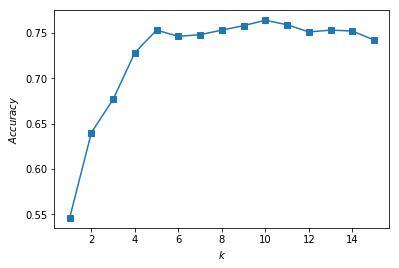

In [132]:
"""Изобразим график обучения и посмотрим как глубина дерева влияет на точность"""
scores=[]
for n in np.arange(1,16):
    dtree=DecisionTreeClassifier(max_depth=n, random_state=1234).fit(X_train, y_train)
    scores.append(dtree.score(X_test, y_test))
    print('Depth is: ', n,'|Accuracy is: ', dtree.score(X_test, y_test))
plt.plot(range(1,16), scores, marker='s');
plt.xlabel('$k$')
plt.ylabel('$Accuracy$');

In [133]:
X_train.shape

(4034, 15)

MaxFeatures is:  2 |Accuracy is:  0.712586719524
MaxFeatures is:  3 |Accuracy is:  0.698711595639
MaxFeatures is:  4 |Accuracy is:  0.742319127849
MaxFeatures is:  5 |Accuracy is:  0.748265609514
MaxFeatures is:  6 |Accuracy is:  0.754212091179
MaxFeatures is:  7 |Accuracy is:  0.740336967294
MaxFeatures is:  8 |Accuracy is:  0.730426164519
MaxFeatures is:  9 |Accuracy is:  0.732408325074
MaxFeatures is:  10 |Accuracy is:  0.723488602577
MaxFeatures is:  11 |Accuracy is:  0.763131813677
MaxFeatures is:  12 |Accuracy is:  0.736372646184
MaxFeatures is:  13 |Accuracy is:  0.726461843409
MaxFeatures is:  14 |Accuracy is:  0.749256689792
MaxFeatures is:  15 |Accuracy is:  0.746283448959


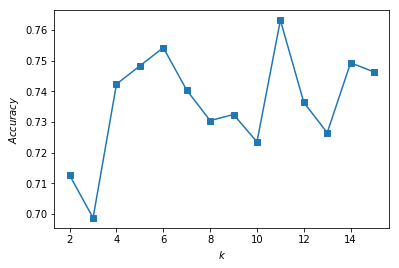

In [134]:
"""Изобразим график обучения и посмотрим как ширина дерева влияет на точность"""
scores=[]

for n in np.arange(2,16):
    dtree=DecisionTreeClassifier(max_depth=6, max_features=n, random_state=41).fit(X_train, y_train)
    scores.append(dtree.score(X_test, y_test))
    print('MaxFeatures is: ', n,'|Accuracy is: ', dtree.score(X_test, y_test))
plt.plot(range(2, 16), scores, marker='s');
plt.xlabel('$k$')
plt.ylabel('$Accuracy$');

### BONUS RandomForestRegressor

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
RF_reg=RandomForestClassifier(n_estimators=15,
                               oob_score=True,
                               random_state=1)

In [137]:
RF_reg.fit(X_train, y_train)

C:\Users\AlexConda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\AlexConda\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [138]:
RF_reg.score(X_test, y_test)

0.77006937561942512

Estimators is:  10 |Accuracy is:  0.749256689792
Estimators is:  20 |Accuracy is:  0.777006937562
Estimators is:  30 |Accuracy is:  0.792864222002
Estimators is:  40 |Accuracy is:  0.791873141724
Estimators is:  50 |Accuracy is:  0.792864222002
Estimators is:  60 |Accuracy is:  0.797819623389
Estimators is:  70 |Accuracy is:  0.799801783944
Estimators is:  80 |Accuracy is:  0.797819623389
Estimators is:  90 |Accuracy is:  0.796828543112
Estimators is:  100 |Accuracy is:  0.788899900892


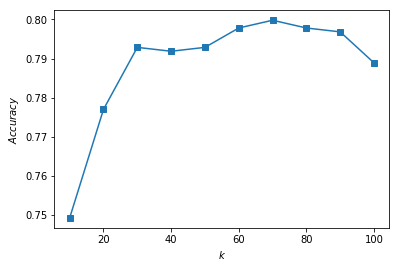

In [139]:
"""Изобразим график обучения и посмотрим как число деревьев в лесу влияет на точность"""
scores=[]
for n in np.arange(10,110,10):
    RF_reg=RandomForestClassifier(n_estimators=n,random_state=42).fit(X_train, y_train)
    scores.append(RF_reg.score(X_test, y_test))
    print('Estimators is: ', n,'|Accuracy is: ', RF_reg.score(X_test, y_test))
plt.plot(range(10, 110, 10), scores, marker='s');
plt.xlabel('$k$')
plt.ylabel('$Accuracy$');

### ЗАДАЧА:
1. Поиграться с парамтерами каждой из моделей и выбить наибольший возможный скор по Accuracy
2. Почитать об алгоритмах:
    RF - https://alexanderdyakonov.wordpress.com/2016/11/14/случайный-лес-random-forest/ ;
    Linear Regression- http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html ;
   RF at sklearn - http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html ; 
   K-NN at sklearn - http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor; 
    Пример спортивного анализа данных (для ознокамления) https://habrahabr.ru/post/202090/